In [27]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [28]:
# File paths
train_file = '../poker+hand/poker-hand-training-true.data'
test_file = '../poker+hand/poker-hand-testing.data'

In [29]:
# Load data
# (comma-separated)
train_data = np.loadtxt(train_file, delimiter=',')
X_train = train_data[:, :-1]           # All columns except the last are features
y_train = train_data[:, -1].astype(int)  # The last column is the target

# Load the testing data
test_data = np.loadtxt(test_file, delimiter=',')
X_test = test_data[:, :-1]
y_test = test_data[:, -1].astype(int)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (25010, 10) (25010,)
Testing data shape: (1000000, 10) (1000000,)


In [30]:
# Create pipeline
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42, max_iter=2000)
)

In [31]:
# Define hyperparameters and perform grid search
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1.0, 10.0],
    'logisticregression__solver': ['lbfgs', 'saga'],
    'logisticregression__multi_class': ['ovr', 'multinomial']
}

# Set up GridSearchCV with 3-fold cross-validation and parallel processing
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

print("Starting grid search for Logistic Regression")
grid_search.fit(X_train, y_train)
print("Grid search finished")

Starting grid search for Logistic Regression


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was depreca

Grid search finished


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [32]:
# Evaluate results
# Output Grid Search Results and Evaluate on Test Data
print("\nBest Parameters Found:")
print(grid_search.best_params_)
print("Best Cross-Validation Score: {:.4f}".format(grid_search.best_score_))

# Evaluate the best model on the testing set
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nTest Accuracy: {:.4f}".format(accuracy))
print("\nClassification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)


Best Parameters Found:
{'logisticregression__C': 0.01, 'logisticregression__multi_class': 'ovr', 'logisticregression__solver': 'lbfgs'}
Best Cross-Validation Score: 0.4994

Test Accuracy: 0.5012

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67    501209
           1       0.00      0.00      0.00    422498
           2       0.00      0.00      0.00     47622
           3       0.00      0.00      0.00     21121
           4       0.00      0.00      0.00      3885
           5       0.00      0.00      0.00      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.50   1000000
   macro avg       0.05      0.10      0.07   1000000
weighted avg       0.25      0.50      0.33   1000000

Confusion Matrix:
[[5

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


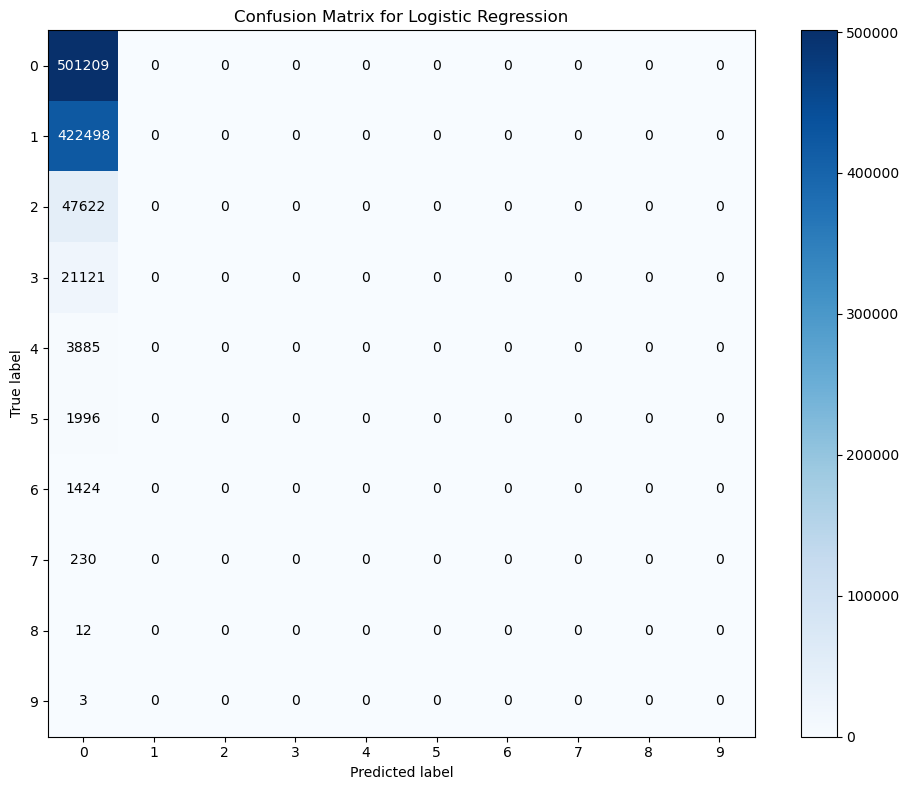

In [33]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.colorbar()

classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

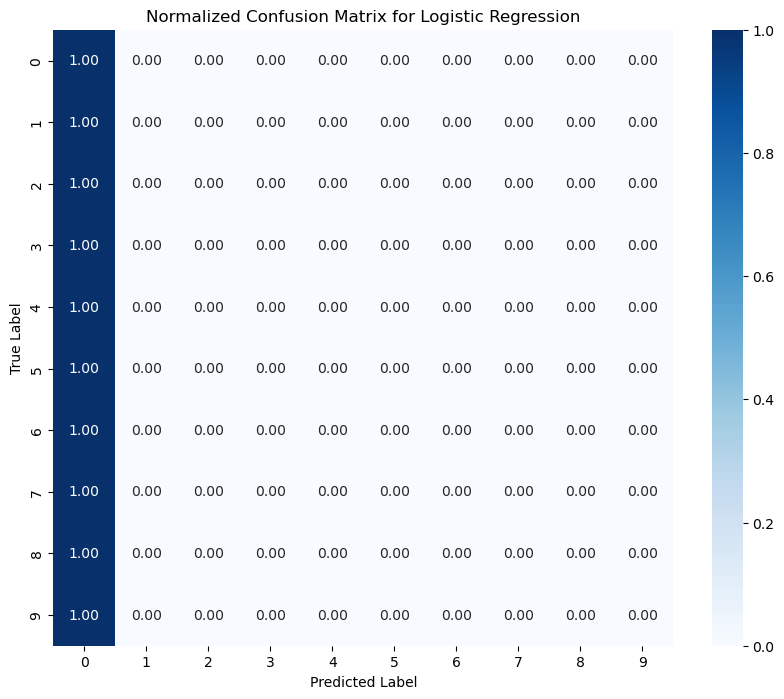

In [34]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Normalize by true label (rows)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.title("Normalized Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()